Выполните по вариантам соответственно реализацию генетического
алгоритма в соответствии с приложенными начальными данными.
Вариант 10

In [2]:
class Chromosome:
    first: float
    second: float
    def __init__(self, first: float, second: float) -> None:
        self.first = first
        self.second = second
    def getFirst(self) -> float:
        return self.first
    def getSecond(self) -> float:
        return self.second
def chromosome_quality(chromosome: Chromosome) -> float:
    x = chromosome.getFirst()
    y = chromosome.getSecond()
    return (x - 3 * y) / (2 * x**2 + 2*y**2 + 1)
def gen_quality(gen: list) -> float:
    result = 0.0
    for chromosome in gen:
        result += chromosome_quality(chromosome)
    return result
def make_next_gen(alpha: Chromosome, omega_1 : Chromosome, omega_2 : Chromosome) ->list:
    children = []
    children.append(Chromosome(omega_1.getFirst(), alpha.getFirst()))
    children.append(Chromosome(omega_2.getFirst(), alpha.getFirst()))
    children.append(Chromosome(alpha.getSecond(), omega_1.getSecond()))
    children.append(Chromosome(alpha.getSecond(), omega_2.getSecond()))
    return children
def select_top_chromosomes(gen: list, count: int):
    return sorted(gen, key = lambda element: chromosome_quality(element), reverse = True)[:count]
def run_evolution(gen: list, steps: int):
    for i in range(steps):
        gen = make_next_gen(*select_top_chromosomes(gen, len(gen) - 1))
    return gen
start_gen = []
start_gen.append(Chromosome(-1, 0))
start_gen.append(Chromosome(0, 1))
start_gen.append(Chromosome(2, -2))
start_gen.append(Chromosome(3, 2))
print(gen_quality(start_gen))
for i in range(4):
    gen = run_evolution(start_gen, i + 1)
    print(gen_quality(select_top_chromosomes(gen, 3)))
    for chromosome in gen:
        print(f"[{chromosome.getFirst()}][{chromosome.getSecond()}][{chromosome_quality(chromosome)}]")

-0.9738562091503267
-0.803921568627451
[3][2][-0.1111111111111111]
[-1][2][-0.6363636363636364]
[-2][2][-0.47058823529411764]
[-2][0][-0.2222222222222222]
-0.420479302832244
[-2][3][-0.4074074074074074]
[-2][3][-0.4074074074074074]
[2][0][0.2222222222222222]
[2][2][-0.23529411764705882]
-1.1795665634674921
[2][2][-0.23529411764705882]
[-2][2][-0.47058823529411764]
[0][2][-0.6666666666666666]
[0][3][-0.47368421052631576]
-0.9651416122004357
[-2][2][-0.47058823529411764]
[0][2][-0.6666666666666666]
[2][2][-0.23529411764705882]
[2][3][-0.25925925925925924]


Найти длину гамильтонова цикла S4 в полном графе K6 после четырех
циклов решения задачи методом отжига по вариантам ниже.

Лучший выбранный маршрут: [1, 2, 3, 6, 4, 5, 1]
Длина лучшего выбранного маршрута: 146
Длина всех рассмотренных маршрутов: [146, 176, 163, 146, 176]


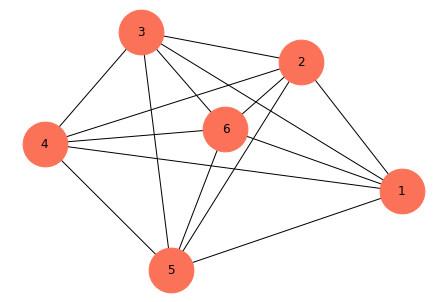

In [8]:
import networkx
import math
def probability(delta, T):
    return 100 * math.e ** (-delta/T)
def reduceTemp(prevT):
    return prevT / 2
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if(item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
    return sum(edges)
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V
def chooseRoute(distance, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength
        if deltaS > 0:
            p = probability(deltaS, T)
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        T = reduceTemp(T)
    return V, arrSum
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
    ''''graph = networkx.Graph()
    graph.add_weighted_edges_from(newDistances)
    networkx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)
'''''
distances = [
    (1, 2, 26),
    (1, 3, 42),
    (1, 4, 44),
    (1, 5, 31),
    (1, 6, 24),
    (2, 3, 20),
    (2, 4, 34),
    (2, 5, 40),
    (2, 6, 15),
    (3, 4, 23),
    (3, 5, 43),
    (3, 6, 20),
    (4, 5, 27),
    (4, 6, 22),
    (5, 6, 26)]
V = [1,2,3,4,5,6,1]
P = [90,45,43,31]
Z = [(3, 4),
     (4, 6),
     (5, 6),
     (6, 2)]
T = 100
graph = networkx.Graph()
graph.add_weighted_edges_from(distances)
networkx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длина всех рассмотренных маршрутов: {arrLength}')


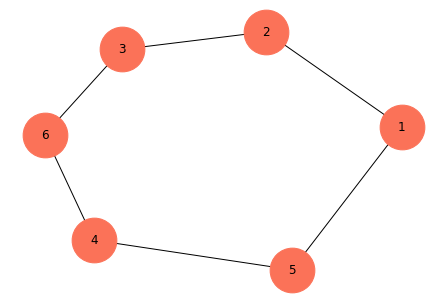

In [11]:
drawRouteGraph(distances, bestRoute)